# Preparations

In [2]:
import torch
import numpy as np
from torch.autograd import Variable
%matplotlib inline

In [3]:
use_gpu = torch.cuda.is_available()
print("use_gpu = " + str(use_gpu))

use_gpu = True


# Structure

![SVHN Structure](https://c1.staticflickr.com/1/907/41989310211_cb9d63bcc2_o.png)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.C1 = nn.Conv2d(3, 64, 5)
        self.C2 = nn.Conv2d(64, 64, 5)
        self.C3 = nn.Conv2d(64, 128, 5)
        self.FC1 = nn.Linear(48 * 4 * 4, 3072)
        self.FC2 = nn.Linear(3072, 2048)
        self.FC3 = nn.Linear(2048, 10)
        
    def forward(self, x):
        # C1
        x = F.relu(self.C1(x))
        # M1
        x = F.max_pool2d(x, (3, 3), stride=(2, 2))
        # C2
        x = F.relu(self.C2(x))
        # M2
        x = F.max_pool2d(x, (3, 3), stride=(2, 2))
        print(x.size())
        # x's size is ()
        # flatten
        x = x.view(-1, 48 * 4 * 4)
        # FC1
        x = F.relu(self.FC1(x))
        # FC2
        x = F.relu(self.FC2(x))
        # FC3
        x = self.FC3(x)
        return x

In [5]:
cnn = CNN()
if (use_gpu):
    cnn.cuda()
print(cnn)

CNN(
  (C1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (C2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1))
  (C3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (FC1): Linear(in_features=768, out_features=3072, bias=True)
  (FC2): Linear(in_features=3072, out_features=2048, bias=True)
  (FC3): Linear(in_features=2048, out_features=10, bias=True)
)


# SYNNUM Dataset

In [6]:
from my_dataset import SYNNUM

In [7]:
import torchvision
import torchvision.transforms as transforms

root_dir = "./data/"

transform_m = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 128

trainset_syn = SYNNUM(root_dir, train=True, transform=transform_m, download=True)
trainloader_syn = torch.utils.data.DataLoader(trainset_syn, batch_size=batch_size,
                                          shuffle=False, num_workers=0)
testset_syn = SYNNUM(root_dir, train=False, transform=transform_m, download=True)
testloader_syn = torch.utils.data.DataLoader(testset_syn, batch_size=batch_size,
                                          shuffle=False, num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The 112th image in the first 128 images in the training set:


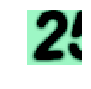

Its correspondent label:
tensor(2)


In [8]:
# randomly plot a sample from training set
import matplotlib.pyplot as plt

inputs = None
labels = None
for i, data in enumerate(trainloader_syn):
    inputs, labels = data
    break

idx = np.random.randint(0, batch_size)
print("The " + str(idx) + "th image in the first " + str(batch_size) +\
      " images in the training set:")
plt.figure(figsize=(1,1))
plt.axis("off")
plt.imshow(inputs[idx].permute(1, 2, 0).numpy())
plt.show()
print("Its correspondent label:\n" + str(labels[idx]))

In [9]:
len(trainset_syn)

479400

# SVHN Dataset

In [11]:
import torchvision
import os.path

root_dir = "./data/"
data_dir = "svhn/"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

batch_size = 128

trainset_svhn = torchvision.datasets.SVHN(os.path.join(root_dir, data_dir),
                                          split="train", transform=transform, download=True)
trainloader_svhn = torch.utils.data.DataLoader(trainset_svhn, batch_size=batch_size,
                                          shuffle=False, num_workers=0)
testset_svhn = torchvision.datasets.SVHN(os.path.join(root_dir, data_dir),
                                          split="test", transform=transform, download=True)
testloader_svhn = torch.utils.data.DataLoader(testset_svhn, batch_size=batch_size,
                                          shuffle=False, num_workers=0)


Using downloaded and verified file: ./data/svhn/train_32x32.mat
Using downloaded and verified file: ./data/svhn/test_32x32.mat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The 30th image in the first 128 images in the training set:


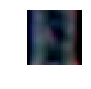

Its correspondent label:
tensor(3)


In [12]:
inputs = None
labels = None
for i, data in enumerate(trainloader_svhn):
    inputs, labels = data
    if i == 1:
        break

idx = np.random.randint(0, batch_size)
print("The " + str(idx) + "th image in the first " + str(batch_size) +\
      " images in the training set:")
plt.figure(figsize=(1,1))
plt.axis("off")
plt.imshow(inputs[idx].permute(1, 2, 0).numpy())
plt.show()
print("Its correspondent label:\n" + str(labels[idx]))

In [13]:
len(trainset_svhn)

73257

# MNIST Dataset

Load the dataset using $\texttt{torchvision}$.

* Usage of $\texttt{transforms.Normalize(mean, std)}$:<br>
Assume that the input has $d$ channels, $\texttt{mean}$ should be a tuple of $d$ values, so should $\texttt{std}$. Let $\texttt{mean = (m1, m2, ..., md)}$ and $\texttt{std = (s1, s2, ..., sd)}$. Then the transform does $$\texttt{input[channel] = (input[channel] - mean[channel]) / std[channel]}\text{.}$$

In [5]:
import torchvision
import torchvision.transforms as transforms

In [19]:
batch_size = 128
root_dir = "./data/mnist/"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, )),
    #transforms.Normalize((0.13066047712053577, ), (1, )),
    transforms.Lambda(lambda x: torch.cat((x, x, x), dim=0))
])

trainset = torchvision.datasets.MNIST(root_dir, train=True, transform=transform,
                                      target_transform=None, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=0)
testset = torchvision.datasets.MNIST(root_dir, train=False, transform=transform,
                                      target_transform=None, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=0)

Processing...
Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The 18th image in the first 128 images in the training set:


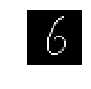

Its correspondent label:
tensor(6)


In [8]:
# randomly plot a sample from training set
import matplotlib.pyplot as plt

inputs = None
labels = None
for i, data in enumerate(trainloader):
    inputs, labels = data
    break

idx = np.random.randint(0, batch_size)
print("The " + str(idx) + "th image in the first " + str(batch_size) +\
      " images in the training set:")
plt.figure(figsize=(1,1))
plt.axis("off")
plt.imshow(inputs[idx].permute(1, 2, 0).numpy())
plt.show()
print("Its correspondent label:\n" + str(labels[idx]))

## Training on MNIST

Or you can load the parameters directly.

In [9]:
%load_ext skip_kernel_extension

In [10]:
import os.path
para_file = "./cnn_mnist"
load_model = os.path.isfile(para_file)
print("load_model = " + str(load_model))

load_model = True


In [11]:
%%skip (not $load_model)
cnn.load_state_dict(torch.load(para_file))

### Optimizer

In [12]:
import torch.optim as optim

lr_init = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=lr_init, momentum=0.9)

def adjust_lr(optimizer, p):
    global lr_init
    lr_0 = lr_init
    alpha = 10
    beta = 0.75
    lr = lr_0 / (1 + alpha * p) ** beta
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

### Training process

In [13]:
%%skip $load_model

prev_loss = np.float("inf")
total_epoch = 30

for epoch in range(total_epoch):
    epoch_loss = 0.0
    running_loss = 0.0
    p = epoch * 1.0 / total_epoch
    adjust_lr(optimizer, p)
    for i, data in enumerate(trainloader):
        inputs, labels = data
        if (use_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%3d] batch loss: %.3f' %
                  (i + 1, running_loss / 50))
            running_loss = 0.0
    print("epoch %d loss: %.3f -> %.3f\n" % (epoch + 1, prev_loss, epoch_loss))
    if prev_loss - epoch_loss < 0.1:
        break
    else:
        prev_loss = epoch_loss

[ 50] batch loss: 2.258
[100] batch loss: 1.116
[150] batch loss: 0.344
[200] batch loss: 0.208
[250] batch loss: 0.179
[300] batch loss: 0.129
[350] batch loss: 0.126
[400] batch loss: 0.146
[450] batch loss: 0.096
epoch 1 loss: inf -> 231.561

[ 50] batch loss: 0.090
[100] batch loss: 0.089
[150] batch loss: 0.076
[200] batch loss: 0.063
[250] batch loss: 0.070
[300] batch loss: 0.069
[350] batch loss: 0.067
[400] batch loss: 0.080
[450] batch loss: 0.057
epoch 2 loss: 231.561 -> 34.103

[ 50] batch loss: 0.062
[100] batch loss: 0.057
[150] batch loss: 0.046
[200] batch loss: 0.042
[250] batch loss: 0.048
[300] batch loss: 0.051
[350] batch loss: 0.045
[400] batch loss: 0.051
[450] batch loss: 0.042
epoch 3 loss: 34.103 -> 22.953

[ 50] batch loss: 0.048
[100] batch loss: 0.043
[150] batch loss: 0.032
[200] batch loss: 0.032
[250] batch loss: 0.038
[300] batch loss: 0.041
[350] batch loss: 0.036
[400] batch loss: 0.040
[450] batch loss: 0.033
epoch 4 loss: 22.953 -> 17.787

[ 50] bat

In [13]:
%%skip $load_model

torch.save(cnn.state_dict(), para_file)

## Testing on MNIST

In [14]:
def evaluate_accuracy(model, dataloader):
    correct = 0
    total = 0
    for i, data in enumerate(dataloader):
        inputs, labels = data
        if (use_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        inputs, labels = Variable(inputs), Variable(labels)
        outputs = model(inputs)
        correct += (torch.max(outputs.data, 1)[1] == labels.data).sum().item()
        total += labels.size()[0]
    acc = correct * 1.0 / total
    return acc

In [15]:
print("Accuracy on MNIST test set (source only): " + str(evaluate_accuracy(cnn, testloader)))

Accuracy on MNIST test set (source only): 0.9912


# MNIST-M Dataset

In [16]:
from my_dataset import MNIST_M

In [21]:
batch_size = 128
root_dir = "./data/"

transform_m = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    #transforms.Normalize((0.4581609321206303, 0.462350402961343, 0.4084781187671726), (1, 1, 1))
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset_m = MNIST_M(root_dir, train=True, transform=transform_m, download=True)
trainloader_m = torch.utils.data.DataLoader(trainset_m, batch_size=batch_size,
                                          shuffle=False, num_workers=0)
testset_m = MNIST_M(root_dir, train=False, transform=transform_m, download=True)
testloader_m = torch.utils.data.DataLoader(testset_m, batch_size=batch_size,
                                          shuffle=False, num_workers=0)

Extracting train.pt.gz
Extracting test.pt.gz


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The 117th image in the first 128 images in the test set:


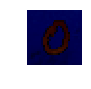

Its correspondent label:
tensor(0)


In [19]:
# randomly plot a sample from training set
import matplotlib.pyplot as plt

inputs = None
labels = None
for i, data in enumerate(trainloader_m):
    inputs, labels = data
    break
    
idx = np.random.randint(0, batch_size)
print("The " + str(idx) + "th image in the first " + str(batch_size) +\
      " images in the training set:")
plt.figure(figsize=(1,1))
plt.axis("off")
plt.imshow(inputs[idx].permute(1, 2, 0).numpy())
plt.show()
print("Its correspondent label:\n" + str(labels[idx]))

## Testing on MNIST-M Dataset (trained on source only)

In [20]:
print("Accuracy on MNIST-M test set (source only): " + str(evaluate_accuracy(cnn, testloader_m)))

Accuracy on MNIST-M test set (source only): 0.5806666666666667


## Training on MNIST-M Dataset

In [21]:
cnn_m = CNN()
if (use_gpu):
    cnn_m.cuda()
print(cnn_m)

CNN(
  (C1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (C2): Conv2d(32, 48, kernel_size=(5, 5), stride=(1, 1))
  (FC1): Linear(in_features=768, out_features=100, bias=True)
  (FC2): Linear(in_features=100, out_features=100, bias=True)
  (FC3): Linear(in_features=100, out_features=10, bias=True)
)


In [22]:
para_file_m = "./cnn_mnist_m"
load_model_m = os.path.isfile(para_file_m)
print("load_model_m = " + str(load_model_m))

load_model_m = False


In [23]:
%%skip (not $load_model_m)
cnn_m.load_state_dict(torch.load(para_file_m))

In [24]:
import torch.optim as optim

lr_init = 0.01/((1+10)**0.75)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_m.parameters(), lr=lr_init, momentum=0.9)

def adjust_lr(optimizer, p):
    global lr_init
    lr_0 = lr_init
    alpha = 10
    beta = 0.75
    lr = lr_0 / (1 + alpha * p) ** beta
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [25]:
%%skip $load_model_m

prev_loss = np.float("inf")
total_epoch = 50

for epoch in range(total_epoch):
    epoch_loss = 0.0
    running_loss = 0.0
    p = epoch * 1.0 / total_epoch
    adjust_lr(optimizer, p)
    for i, data in enumerate(trainloader_m):
        inputs, labels = data
        if (use_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = cnn_m(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%3d] batch loss: %.3f' %
                  (i + 1, running_loss / 50))
            running_loss = 0.0
    print("epoch %d loss: %.3f -> %.3f\n" % (epoch + 1, prev_loss, epoch_loss))
    if prev_loss - epoch_loss < 0.1:
        prev_loss = epoch_loss
        break
    else:
        prev_loss = epoch_loss

[ 50] batch loss: 2.302
[100] batch loss: 2.302
[150] batch loss: 2.301
[200] batch loss: 2.300
[250] batch loss: 2.298
[300] batch loss: 2.297
[350] batch loss: 2.295
[400] batch loss: 2.294
[450] batch loss: 2.292
epoch 1 loss: inf -> 1059.286

[ 50] batch loss: 2.288
[100] batch loss: 2.286
[150] batch loss: 2.282
[200] batch loss: 2.277
[250] batch loss: 2.271
[300] batch loss: 2.264
[350] batch loss: 2.253
[400] batch loss: 2.237
[450] batch loss: 2.212
epoch 2 loss: 1059.286 -> 1042.553

[ 50] batch loss: 2.169
[100] batch loss: 2.129
[150] batch loss: 2.069
[200] batch loss: 1.986
[250] batch loss: 1.898
[300] batch loss: 1.813
[350] batch loss: 1.720
[400] batch loss: 1.611
[450] batch loss: 1.480
epoch 3 loss: 1042.553 -> 859.559

[ 50] batch loss: 1.385
[100] batch loss: 1.321
[150] batch loss: 1.231
[200] batch loss: 1.149
[250] batch loss: 1.072
[300] batch loss: 1.011
[350] batch loss: 0.996
[400] batch loss: 0.922
[450] batch loss: 0.838
epoch 4 loss: 859.559 -> 504.832



epoch 33 loss: 71.471 -> 70.375

[ 50] batch loss: 0.143
[100] batch loss: 0.161
[150] batch loss: 0.150
[200] batch loss: 0.147
[250] batch loss: 0.156
[300] batch loss: 0.152
[350] batch loss: 0.156
[400] batch loss: 0.159
[450] batch loss: 0.138
epoch 34 loss: 70.375 -> 69.330

[ 50] batch loss: 0.141
[100] batch loss: 0.159
[150] batch loss: 0.148
[200] batch loss: 0.145
[250] batch loss: 0.154
[300] batch loss: 0.150
[350] batch loss: 0.154
[400] batch loss: 0.157
[450] batch loss: 0.136
epoch 35 loss: 69.330 -> 68.330

[ 50] batch loss: 0.139
[100] batch loss: 0.157
[150] batch loss: 0.146
[200] batch loss: 0.143
[250] batch loss: 0.152
[300] batch loss: 0.147
[350] batch loss: 0.151
[400] batch loss: 0.155
[450] batch loss: 0.134
epoch 36 loss: 68.330 -> 67.378

[ 50] batch loss: 0.137
[100] batch loss: 0.155
[150] batch loss: 0.143
[200] batch loss: 0.141
[250] batch loss: 0.150
[300] batch loss: 0.146
[350] batch loss: 0.149
[400] batch loss: 0.153
[450] batch loss: 0.133
epoc

In [26]:
%%skip $load_model_m

torch.save(cnn_m.state_dict(), para_file_m)

In [27]:
print("Accuracy on MNIST-M test set (train on target): " + str(evaluate_accuracy(cnn_m, testloader_m)))

Accuracy on MNIST-M test set: 0.9513333333333334


# Unsupervised Domain Adaptation

## Structure (GRL)

![SVHN Structure](https://c1.staticflickr.com/1/907/41989310211_cb9d63bcc2_o.png)

In [28]:
from my_dataset import ST_Dataset

In [29]:
batch_size = 128

trainset_da = ST_Dataset(trainset, trainset_m, batch_size)
trainloader_da = torch.utils.data.DataLoader(trainset_da, batch_size=batch_size,
                                          shuffle=False, num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The 105th image in the first 128 images in the training set:


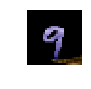

Its correspondent label:
I don't know :)

From domain:
Target


In [30]:
# randomly plot a sample from test set
import matplotlib.pyplot as plt

inputs = None
labels = None
for i, data in enumerate(trainloader_da):
    inputs, labels, domain = data
    if i == 2:
        break

idx = np.random.randint(0, batch_size)
print("The " + str(idx) + "th image in the first " + str(batch_size) +\
      " images in the training set:")
plt.figure(figsize=(1,1))
plt.axis("off")
plt.imshow(inputs[idx].permute(1, 2, 0).numpy())
plt.show()
print("Its correspondent label:")
if labels[idx].item() == -1:
    print("I don't know :)\n")
else:
    print(str(labels[idx].item()) + "\n")

print("From domain:")
if domain[idx].item() == 0:
    print("Source")
else:
    print("Target")

In [31]:
class GRL_func(torch.autograd.Function):

    @staticmethod
    def forward(ctx, inputs, lamda):
        ctx.save_for_backward(lamda)
        return inputs

    @staticmethod
    def backward(ctx, grad_outputs):
        lamda, = ctx.saved_tensors
        return -lamda * grad_outputs, None

In [32]:
class GRL(nn.Module):
    
    def __init__(self, lamda_init):
        super(GRL, self).__init__()
        self.GRL_func = GRL_func.apply
        self.lamda = nn.Parameter(torch.Tensor(1), requires_grad=False)
        self.set_lamda(lamda_init)
        
    def forward(self, x):
        return self.GRL_func(x, self.lamda)
    
    def set_lamda(self, lamda_new):
        self.lamda[0] = lamda_new

In [33]:
class CNN_DA(nn.Module):
    
    def __init__(self, lamda_init=0):
        super(CNN_DA, self).__init__()
        # lamda
        self.lamda = lamda_init
        # feature extractor
        self.C1 = nn.Conv2d(3, 32, 5)
        self.C2 = nn.Conv2d(32, 48, 5)
        # label classifier
        self.LC_FC1 = nn.Linear(48 * 4 * 4, 100)
        self.LC_FC2 = nn.Linear(100, 100)
        self.LC_FC3 = nn.Linear(100, 10)
        # domain classifier
        self.GRL_layer = GRL(lamda_init)
        self.DC_FC1 = nn.Linear(48 * 4 * 4, 100)
        self.DC_FC2 = nn.Linear(100, 1)
        
    def forward(self, x):
        # C1
        x = F.relu(self.C1(x))
        # M1
        x = F.max_pool2d(x, (2, 2))
        # C2
        x = F.relu(self.C2(x))
        # M2
        x = F.max_pool2d(x, (2, 2))
        # x's size is (128, 48, 4, 4)
        # flatten
        x = x.view(-1, 48 * 4 * 4)
        # label classifier
        # LC_FC1
        x_l = F.relu(self.LC_FC1(x))
        # LC_FC2
        x_l = F.relu(self.LC_FC2(x_l))
        # LC_FC3
        x_l = self.LC_FC3(x_l)
        # domain classifier
        # GRL
        x_d = self.GRL_layer(x)
        # DC_FC1
        x_d = F.relu(self.DC_FC1(x_d))
        # DC_FC2
        x_d = F.sigmoid(self.DC_FC2(x_d))
        return x_l, x_d
    
    def set_lamda(self, lamda_new):
        self.GRL_layer.set_lamda(lamda_new)

In [34]:
cnn_da = CNN_DA(0)
if (use_gpu):
    cnn_da.cuda()
print(cnn_da)

CNN_DA(
  (C1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (C2): Conv2d(32, 48, kernel_size=(5, 5), stride=(1, 1))
  (LC_FC1): Linear(in_features=768, out_features=100, bias=True)
  (LC_FC2): Linear(in_features=100, out_features=100, bias=True)
  (LC_FC3): Linear(in_features=100, out_features=10, bias=True)
  (GRL_layer): GRL()
  (DC_FC1): Linear(in_features=768, out_features=100, bias=True)
  (DC_FC2): Linear(in_features=100, out_features=1, bias=True)
)


In [35]:
para_file_da = "./cnn_mnist_to_mnist_m"
load_model_da = os.path.isfile(para_file_da)
print("load_model_da = " + str(load_model_da))

load_model_da = False


In [36]:
%%skip (not $load_model_da)
cnn.load_state_dict(torch.load(para_file_da))

### Optimizer

In [37]:
from math import exp

lr_init = 0.01
criterion_LC = nn.CrossEntropyLoss()
criterion_DC = nn.BCELoss()
optimizer = optim.SGD(filter(lambda p: p.requires_grad, cnn_da.parameters()), lr=lr_init, momentum=0.9)

def adjust_lr(optimizer, p):
    global lr_init
    lr_0 = lr_init
    alpha = 10
    beta = 0.75
    lr = lr_0 / (1 + alpha * p) ** beta
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr
        
def adjust_lamda(model, p):
    gamma = 10
    lamda = 2 / (1 + exp(- gamma * p)) - 1
    model.set_lamda(lamda)
    return lamda

### Training process

In [38]:
#%%skip $load_model_da

prev_loss = np.float("inf")
total_epoch = 40

for epoch in range(total_epoch):
    epoch_loss = 0.0
    running_loss = 0.0
    p = epoch * 1.0 / total_epoch
    adjust_lr(optimizer, p)
    lamda = adjust_lamda(cnn_da, p)
    for i, data in enumerate(trainloader_da):
        source_size = data[0].size()[0] // 2
        inputs, labels, domains = data
        domains = domains.to(torch.float32)
        if (use_gpu):
            inputs, labels, domains = inputs.cuda(), labels.cuda(), domains.cuda()
        inputs, labels, domains = Variable(inputs), Variable(labels), Variable(domains)
        optimizer.zero_grad()
        outputs_LC, outputs_DC = cnn_da(inputs)
        outputs_DC = outputs_DC.view(-1)
        loss_LC = criterion_LC(outputs_LC[:source_size], labels[:source_size])
        loss_DC = criterion_DC(outputs_DC, domains)
        loss = loss_LC + loss_DC
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%3d] batch loss: %.3f' %
                  (i + 1, running_loss / 50))
            running_loss = 0.0
    print("epoch %d loss: %.3f -> %.3f\n" % (epoch + 1, prev_loss, epoch_loss))
    if prev_loss - epoch_loss < 0.1:
        prev_loss = epoch_loss
        pass
    else:
        prev_loss = epoch_loss

[ 50] batch loss: 2.837
[100] batch loss: 1.463
[150] batch loss: 0.734
[200] batch loss: 0.475
[250] batch loss: 0.443
[300] batch loss: 0.368
[350] batch loss: 0.267
[400] batch loss: 0.334
[450] batch loss: 0.256
[500] batch loss: 0.298
[550] batch loss: 0.274
[600] batch loss: 0.259
[650] batch loss: 0.209
[700] batch loss: 0.185
[750] batch loss: 0.219
[800] batch loss: 0.201
[850] batch loss: 0.170
[900] batch loss: 0.144
epoch 1 loss: inf -> 459.455

[ 50] batch loss: 0.392
[100] batch loss: 0.257
[150] batch loss: 0.289
[200] batch loss: 0.347
[250] batch loss: 0.226
[300] batch loss: 0.190
[350] batch loss: 0.167
[400] batch loss: 0.159
[450] batch loss: 0.172
[500] batch loss: 0.165
[550] batch loss: 0.160
[600] batch loss: 0.165
[650] batch loss: 0.158
[700] batch loss: 0.150
[750] batch loss: 0.166
[800] batch loss: 0.147
[850] batch loss: 0.149
[900] batch loss: 0.128
epoch 2 loss: 459.455 -> 181.733

[ 50] batch loss: 0.149
[100] batch loss: 0.142
[150] batch loss: 0.139


[650] batch loss: 0.680
[700] batch loss: 0.661
[750] batch loss: 0.690
[800] batch loss: 0.639
[850] batch loss: 0.669
[900] batch loss: 0.653
epoch 18 loss: 615.709 -> 616.432

[ 50] batch loss: 0.688
[100] batch loss: 0.652
[150] batch loss: 0.679
[200] batch loss: 0.650
[250] batch loss: 0.664
[300] batch loss: 0.662
[350] batch loss: 0.645
[400] batch loss: 0.660
[450] batch loss: 0.663
[500] batch loss: 0.655
[550] batch loss: 0.667
[600] batch loss: 0.661
[650] batch loss: 0.645
[700] batch loss: 0.637
[750] batch loss: 0.743
[800] batch loss: 0.629
[850] batch loss: 0.664
[900] batch loss: 0.680
epoch 19 loss: 616.432 -> 611.634

[ 50] batch loss: 0.668
[100] batch loss: 0.686
[150] batch loss: 0.666
[200] batch loss: 0.659
[250] batch loss: 0.655
[300] batch loss: 0.651
[350] batch loss: 0.637
[400] batch loss: 0.663
[450] batch loss: 0.669
[500] batch loss: 0.669
[550] batch loss: 0.661
[600] batch loss: 0.667
[650] batch loss: 0.647
[700] batch loss: 0.629
[750] batch loss: 

[250] batch loss: 0.671
[300] batch loss: 0.656
[350] batch loss: 0.639
[400] batch loss: 0.647
[450] batch loss: 0.656
[500] batch loss: 0.667
[550] batch loss: 0.662
[600] batch loss: 0.668
[650] batch loss: 0.668
[700] batch loss: 0.666
[750] batch loss: 0.666
[800] batch loss: 0.660
[850] batch loss: 0.637
[900] batch loss: 0.647
epoch 36 loss: 614.287 -> 606.828

[ 50] batch loss: 0.673
[100] batch loss: 0.655
[150] batch loss: 0.659
[200] batch loss: 0.686
[250] batch loss: 0.658
[300] batch loss: 0.664
[350] batch loss: 0.652
[400] batch loss: 0.653
[450] batch loss: 0.657
[500] batch loss: 0.670
[550] batch loss: 0.689
[600] batch loss: 0.710
[650] batch loss: 0.689
[700] batch loss: 0.667
[750] batch loss: 0.645
[800] batch loss: 0.636
[850] batch loss: 0.632
[900] batch loss: 0.645
epoch 37 loss: 606.828 -> 611.176

[ 50] batch loss: 0.668
[100] batch loss: 0.653
[150] batch loss: 0.652
[200] batch loss: 0.664
[250] batch loss: 0.670
[300] batch loss: 0.659
[350] batch loss: 

In [39]:
%%skip $load_model_da

torch.save(cnn.state_dict(), para_file_da)

In [40]:
def evaluate_da_accuracy(model, dataloader):
    correct = 0
    total = 0
    for i, data in enumerate(dataloader):
        inputs, labels = data
        if (use_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        inputs, labels = Variable(inputs), Variable(labels)
        outputs_LC, _ = model(inputs)
        correct += (torch.max(outputs_LC.data, 1)[1] == labels.data).sum().item()
        total += labels.size()[0]
    acc = correct * 1.0 / total
    return acc

In [42]:
print("Accuracy on MNIST-M test set (source only): " + str(evaluate_da_accuracy(cnn_da, testloader_m)))

Accuracy on MNIST-M test set (source only): 0.8186666666666667
